This python notebook derives the analytical expressions for an airfoil with pitch-plunge-flap degrees of freedom (Section 3.3 of Palacios & Cesnik's book)


*Set up environment*

In [136]:
import sympy as sym
import warnings

sym.init_printing(use_unicode=False,wrap_line=False)
warnings.filterwarnings("ignore")

Upwash due to pitch angle (wa) and to flap angle (wd)

In [137]:
a0,a1,d0,d1=sym.symbols('alpha_0, alpha_1, delta_0, delta_1')              # Primary variables (pitch, pitch rate, flap, flap rate)
th =sym.symbols('theta', real = True)                                      # Glauert's variable and its value at the flap hinge
nuea,thfh = sym.symbols('nu_ea, theta_fh', real = True, constant = True)   # Non-dimensional distance from mid-chord of elastic axis and flap hinge
nufh=-sym.cos(thfh)

wa=a0-a1*(sym.cos(th)+nuea)
wd=d0-d1*(sym.cos(th)+nufh)

Obtain the coefficients of the Fourier expansion (Glauert expansion), Eq. (3.38)

In [138]:
A_0 = (1/sym.pi)*(sym.integrate(wa,               (th,0,sym.pi)) + sym.integrate(wd,               (th,thfh,sym.pi)))
A_1 = (1/sym.pi)*(sym.integrate(wa*sym.cos(th),   (th,0,sym.pi)) + sym.integrate(wd*sym.cos(th),   (th,thfh,sym.pi)))
A_2 = (1/sym.pi)*(sym.integrate(wa*sym.cos(2*th), (th,0,sym.pi)) + sym.integrate(wd*sym.cos(2*th), (th,thfh,sym.pi)))
A_3 = (1/sym.pi)*(sym.integrate(wa*sym.cos(3*th), (th,0,sym.pi)) + sym.integrate(wd*sym.cos(3*th), (th,thfh,sym.pi)))

Quasi-steady lift and moment coefficient, Eq. (3.39)

In [139]:
c_l0=2*sym.pi*(A_0-A_1)
c_m0=sym.pi/2*(A_1-A_2)

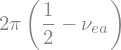

In [140]:
# Lift and moment derivatives with pitch angle (Eq. 3.43)
display(sym.diff(c_l0,a0),sym.diff(c_l0,a1),sym.simplify(sym.diff(c_m0,a0)),sym.simplify(sym.diff(c_m0,a1)))

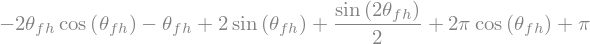

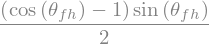

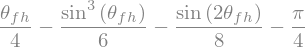

In [141]:
# Lift and moment derivatives with flap angle (Eq. 3.44)
display(sym.simplify(sym.diff(c_l0,d0)),sym.simplify(sym.diff(c_l0,d1)),sym.simplify(sym.diff(c_m0,d0)),sym.expand(sym.trigsimp(sym.diff(c_m0,d1))))

Non-stationary lift and moment coefficient, Eq. (3.39)

In [142]:
c_l1=sym.pi*(A_0-A_2)
c_m1=sym.pi/8*(-2*A_0+A_1+2*A_2-A_3)

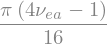

In [143]:
# Lift and moment derivatives with pitch angle (Eq. 3.51)
display(sym.diff(c_l1,a0),sym.diff(c_l1,a1),sym.simplify(sym.diff(c_m1,a0)),sym.simplify(sym.diff(c_m1,a1)))

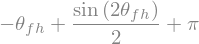

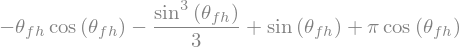

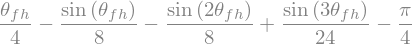

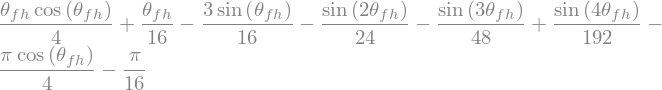

In [144]:
# Lift and moment derivatives with pitch angle (Eq. 3.52)
display(sym.simplify(sym.diff(c_l1,d0)),sym.simplify(sym.diff(c_l1,d1)),sym.simplify(sym.diff(c_m1,d0)),sym.expand(sym.trigsimp(sym.diff(c_m1,d1))))

Note finally that Some additional manipulation is needed to obtain the constants in the book.
Rafa Palacios (r.palacios.imperial.ac.uk), March 2025